# Download Dataset

In [ ]:
!gdown --id 1sQEIPh3bdKQ_1J3g0Z8CRqD6uU7v746l

In [ ]:
!unzip dataset.zip

In [1]:
import pathlib
data_dir = pathlib.Path("./flowers")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

4317


# Load dataset

In [2]:
import cv2
import numpy as np
import os

dataset = []
count = 0
for label in os.listdir("./flowers/"):
    for filename in os.listdir(os.path.join("./flowers/",label)):
        count = count + 1
        print(str(count) + " ---loading " + filename)
        image = cv2.imread(os.path.join("./flowers/",label,filename))
        dataset.append((image, label))

1 ---loading 100080576_f52e8ee070_n.jpg
2 ---loading 10140303196_b88d3d6cec.jpg
3 ---loading 10172379554_b296050f82_n.jpg
4 ---loading 10172567486_2748826a8b.jpg
5 ---loading 10172636503_21bededa75_n.jpg
6 ---loading 102841525_bd6628ae3c.jpg
7 ---loading 10300722094_28fa978807_n.jpg
8 ---loading 1031799732_e7f4008c03.jpg
9 ---loading 10391248763_1d16681106_n.jpg
10 ---loading 10437754174_22ec990b77_m.jpg
11 ---loading 10437770546_8bb6f7bdd3_m.jpg
12 ---loading 10437929963_bc13eebe0c.jpg
13 ---loading 10466290366_cc72e33532.jpg
14 ---loading 10466558316_a7198b87e2.jpg
15 ---loading 10555749515_13a12a026e.jpg
16 ---loading 10555815624_dc211569b0.jpg
17 ---loading 10555826524_423eb8bf71_n.jpg
18 ---loading 10559679065_50d2b16f6d.jpg
19 ---loading 105806915_a9c13e2106_n.jpg
20 ---loading 10712722853_5632165b04.jpg
21 ---loading 107592979_aaa9cdfe78_m.jpg
22 ---loading 10770585085_4742b9dac3_n.jpg
23 ---loading 10841136265_af473efc60.jpg
24 ---loading 10993710036_2033222c91.jpg
25 ---loadin

In [3]:
import random
print(random.sample(dataset, 10))

[(array([[[ 0, 21, 16],
        [ 0, 20, 15],
        [ 0, 21, 16],
        ...,
        [ 0, 19, 14],
        [ 0, 19, 14],
        [ 0, 19, 14]],

       [[ 0, 21, 16],
        [ 0, 20, 15],
        [ 0, 21, 16],
        ...,
        [ 0, 19, 14],
        [ 0, 19, 14],
        [ 0, 19, 14]],

       [[ 0, 22, 17],
        [ 0, 21, 16],
        [ 0, 21, 16],
        ...,
        [ 0, 19, 14],
        [ 0, 19, 14],
        [ 0, 19, 14]],

       ...,

       [[ 1, 40, 38],
        [ 0, 75, 74],
        [10, 82, 90],
        ...,
        [ 0, 54, 54],
        [ 0, 54, 55],
        [ 0, 55, 58]],

       [[ 2, 39, 37],
        [ 0, 60, 59],
        [10, 84, 90],
        ...,
        [ 0, 54, 54],
        [ 0, 54, 55],
        [ 0, 53, 56]],

       [[ 2, 39, 35],
        [ 0, 49, 50],
        [ 7, 83, 89],
        ...,
        [ 1, 55, 55],
        [ 0, 54, 55],
        [ 0, 52, 55]]], dtype=uint8), 'dandelion'), (array([[[ 0, 14,  2],
        [ 0, 13,  5],
        [ 0, 13,  5],
        

In [4]:
import random
random.shuffle(dataset)

# Display dataset

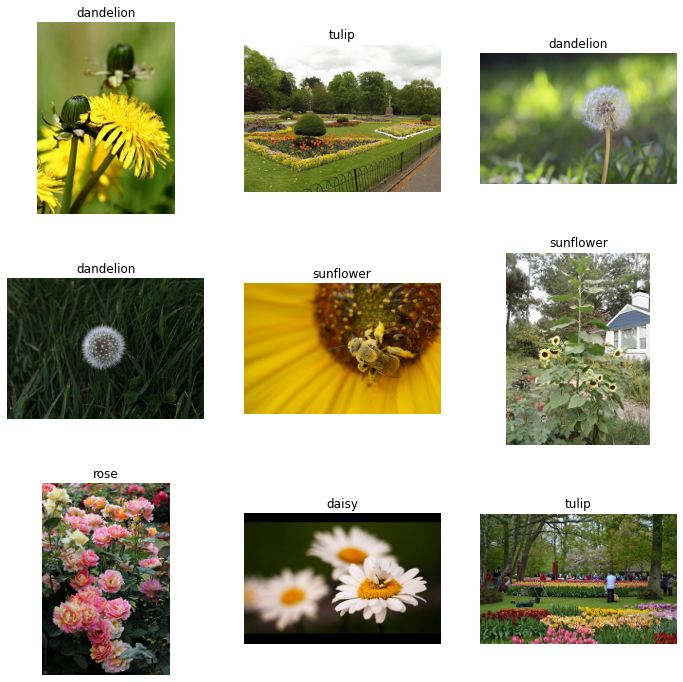

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.imshow(dataset[i][0][:,:,::-1])
    ax.axis('off')
    ax.set_title(dataset[i][1])
plt.show()

# Preprocessing

## Resizing

In [6]:
image_size = (32, 32)

In [7]:
import cv2
resized = []
for d in dataset:
    resized.append((cv2.resize(d[0], image_size), d[1]))

In [8]:
dataset = resized

## Reshape

In [13]:
images = np.asarray([d[0] for d in dataset])
print(images.shape)

(4317, 32, 32, 3)


On aplatit les images avec la méthode flatten de numpy

In [14]:
images = np.asarray([d[0].flatten() for d in dataset])
print(images.shape)

(4317, 3072)


In [15]:
labels_classes_mapping = {"daisy":0,"dandelion":1,"rose":2,"sunflower":3,"tulip":4}
labels = np.asarray([labels_classes_mapping[d[1]] for d in dataset])
print(labels.shape)

(4317,)


## Normalization

On normalise nos images en les divisant par 255

In [16]:
images = images.astype(np.float32) / 255.

# Split Train/Test

In [17]:
from sklearn.model_selection import train_test_split
(train_x, test_x, train_y, test_y) = train_test_split(images,labels)

# SVM

In [18]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x, train_y)

SVC(kernel='linear')

In [19]:
predicted_y = svc.predict(test_x)

In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(test_y,predicted_y))

Accuracy on unknown data is 0.387037037037037
